<a href="https://colab.research.google.com/github/codegithubka/Physics-4AL-Gooogle-Collab-Files/blob/main/FinalProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('drive')
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

import numpy as np
data0 = np.loadtxt('/content/drive/MyDrive/no mass - Sheet1.csv',skiprows=1,delimiter=',')
data200 = np.loadtxt('/content/drive/MyDrive/200 - Sheet1.csv',skiprows=1,delimiter=',')
data400 = np.loadtxt('/content/drive/MyDrive/400 - Sheet1.csv',skiprows=1,delimiter=',')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
data0_x=data0[20:,1]/100
data200_x=data200[20:,1]/100
data400_x=data400[20:,1]/100

data0_t=(data0[20:,0]-data0[0,0])/1000
data200_t=(data200[20:,0]-data200[0,0])/1000
data400_t=(data400[20:,0]-data400[0,0])/1000

In [ ]:
def plot_array(array_x, array_t, name):
  array_t=(array_t[:1070])
  array_x=(array_x[:1070])
  
  plt.plot(array_t,array_x,color="red")
  plt.title('Position and time '+str(name))
  plt.xlabel('Time (sec)')
  plt.ylabel('Position (m)')


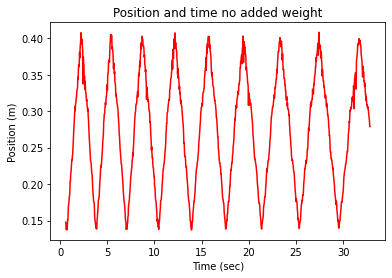

In [ ]:
plot_array(data0_x, data0_t, "no added weight")

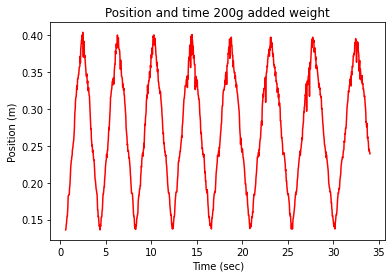

In [ ]:
plot_array(data200_x, data200_t, '200g added weight')

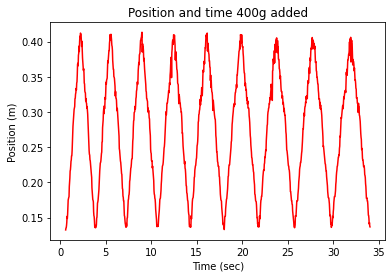

In [ ]:
plot_array(data400_x, data400_t, "400g added")

In [ ]:
def fric(m):
  return 0.003*m*9.81

def drag(v):
  A= (1/2)*1.225*2*0.005
  return A*np.square(v)

def drag_work(v,m):
  dw=[]
  for i in range(len(v)-1):
    J=1.225*1*0.002
    dw.append(m/2/(J*.28*2*i/(2*m*v[i])+1/v[0])**2)
  return dw

def KE(v,m):
  return 1/2*m*np.square(v)

In [ ]:
def get_v(array_x,array_t):
  #read in data from ultrasound
  x = array_x
  t = array_t

  delta_t = []
  p=[]
  v=[]

#select maxes
  for i in range(x.size-5):
    if ((x[i]>.35) & (x[i]> x[i+1]) & (x[i]> x[i-1])& (x[i]> x[i+2])& (x[i]> x[i-2])
      & (x[i]> x[i+3])& (x[i]> x[i-3])& (x[i]> x[i-4])& (x[i]> x[i+4]) & (x[i]> x[i-5])& (x[i]> x[i+5])):
      p.append(i)
      continue;
    elif ((x[i]>.35) & (x[i]> x[i+1]) & (x[i]> x[i-1])):
      p.append(i)

  
#get arrays for delta t per oscillation, and v max per oscillation
  for i in range(len(p)-1):
    dt=t[p[i+1]]-t[p[i]]
    if (dt > 2):
      v.append(.28/(dt/2))
      delta_t.append(dt)
  return v[6:]


In [ ]:
def plot_vel(array_x,array_t, name):
  plt.plot(get_v(array_x,array_t))
  plt.title('Max velocity per oscillation '+str(name))
  plt.xlabel('Oscillation')
  plt.ylabel('Velocity (m/s)')

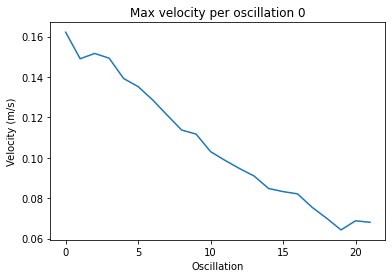

In [ ]:
plot_vel(data0_x,data0_t,0)

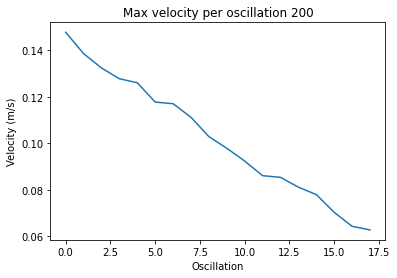

In [ ]:
plot_vel(data200_x,data200_t,200)

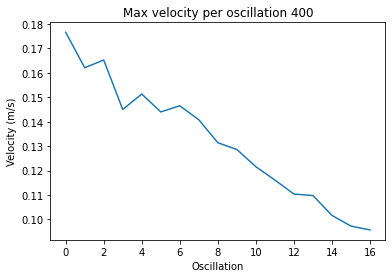

In [ ]:
plot_vel(data400_x,data400_t,400)

In [ ]:
# def get_force(array, mass):
#   return drag(get_v(array))#+fric(mass)


# plt.plot(get_force(data400, .8))
# plt.title('Instantaneous friction and air drag 400g')
# plt.xlabel('Time (sec)')
# plt.ylabel('Force (N)')

In [ ]:
def get_work(array_x,array_t,mass):
  f=drag(get_v(array_x,array_t))
  w=[0]
  for i in range (np.size(f)-1):
    w.append(w[i]+f[i+1]*.28*2)
  return w

def get_KE(array_x,array_t,mass):
  delta_KE = []

  ke = KE(get_v(array_x,array_t),mass)
  for i in range(len(ke)-1):
    dke=ke[0]-ke[i]
    delta_KE.append(dke)
  return delta_KE


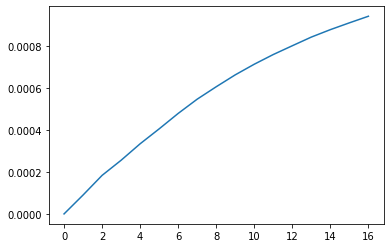

In [ ]:
plt.plot(get_work(data400_x,data400_t,.690))

In [ ]:
def final_plot(array_x,array_t, mass):

  # fexp=np.gradient(get_KE(data,mass))
  # fcal=get_force(data, mass)

  ke=get_KE(array_x,array_t,mass)

  w = get_work(array_x,array_t,mass) 

  plt.plot(ke, label = 'KE Loss')
  plt.plot(w, color='red', label = 'Work')
  plt.legend()
  plt.title('Energy loss vs work due to friction and air drag 400g')
  plt.xlabel('Oscillation')
  plt.ylabel('Energy (J)')


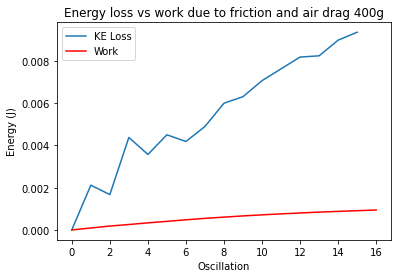

In [ ]:
final_plot(data400_x,data400_t,.862)

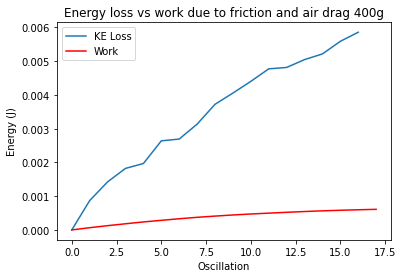

In [ ]:
final_plot(data200_x,data200_t,.662)

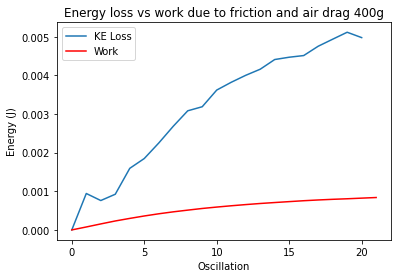

In [ ]:
final_plot(data0_x,data0_t,.462)